In [83]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn import svm
from sklearn import metrics
## libraries for ANN
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

import missingno as mn

In [84]:
## warning
import warnings
warnings.filterwarnings('ignore')

In [85]:
## load the data set
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [87]:
## check for missing values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [88]:
##statistical Analysis
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [89]:
## Exploratory data analysis
## correlation matrix
corr_mat = data.corr(numeric_only=True)
corr_mat

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

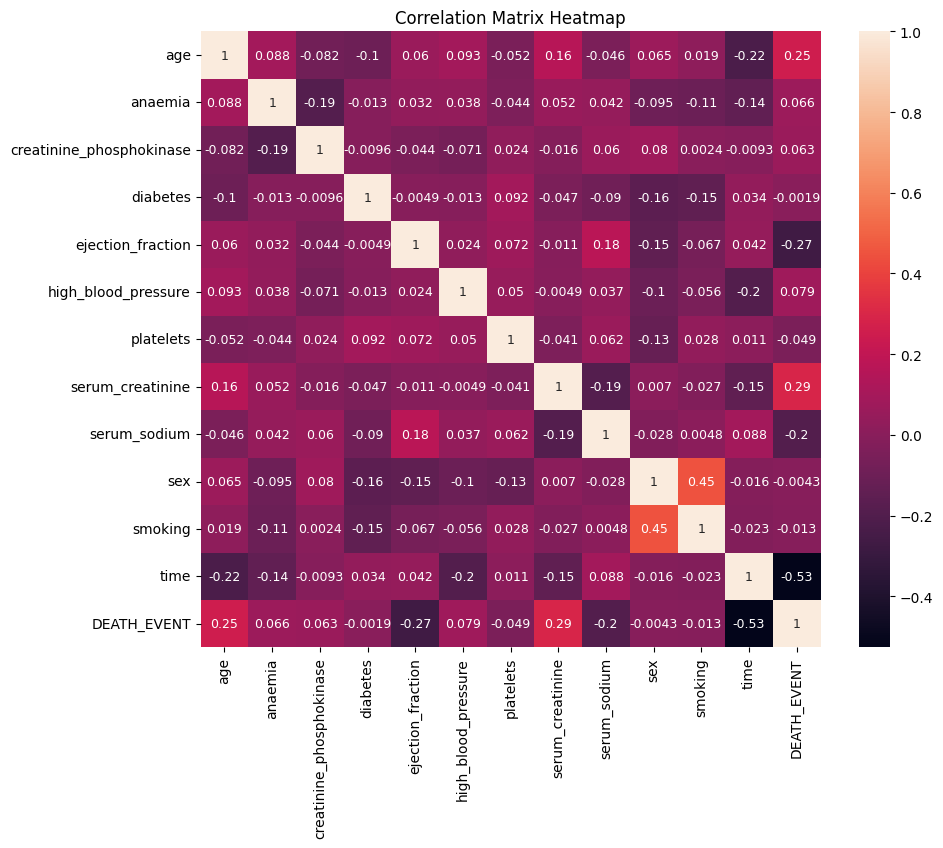

In [90]:
## plot the heat map
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, annot_kws={'size': 9})
plt.title("Correlation Matrix Heatmap", loc="center")

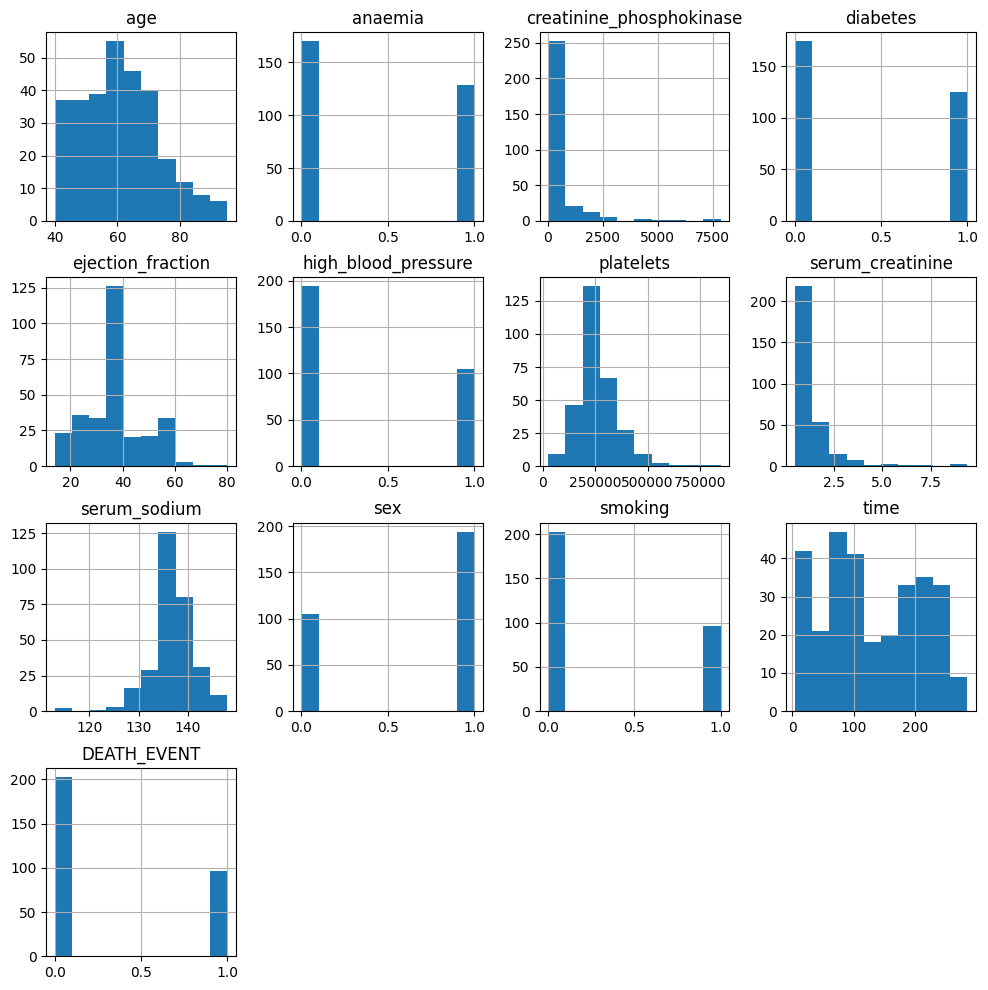

In [91]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

<Axes: >

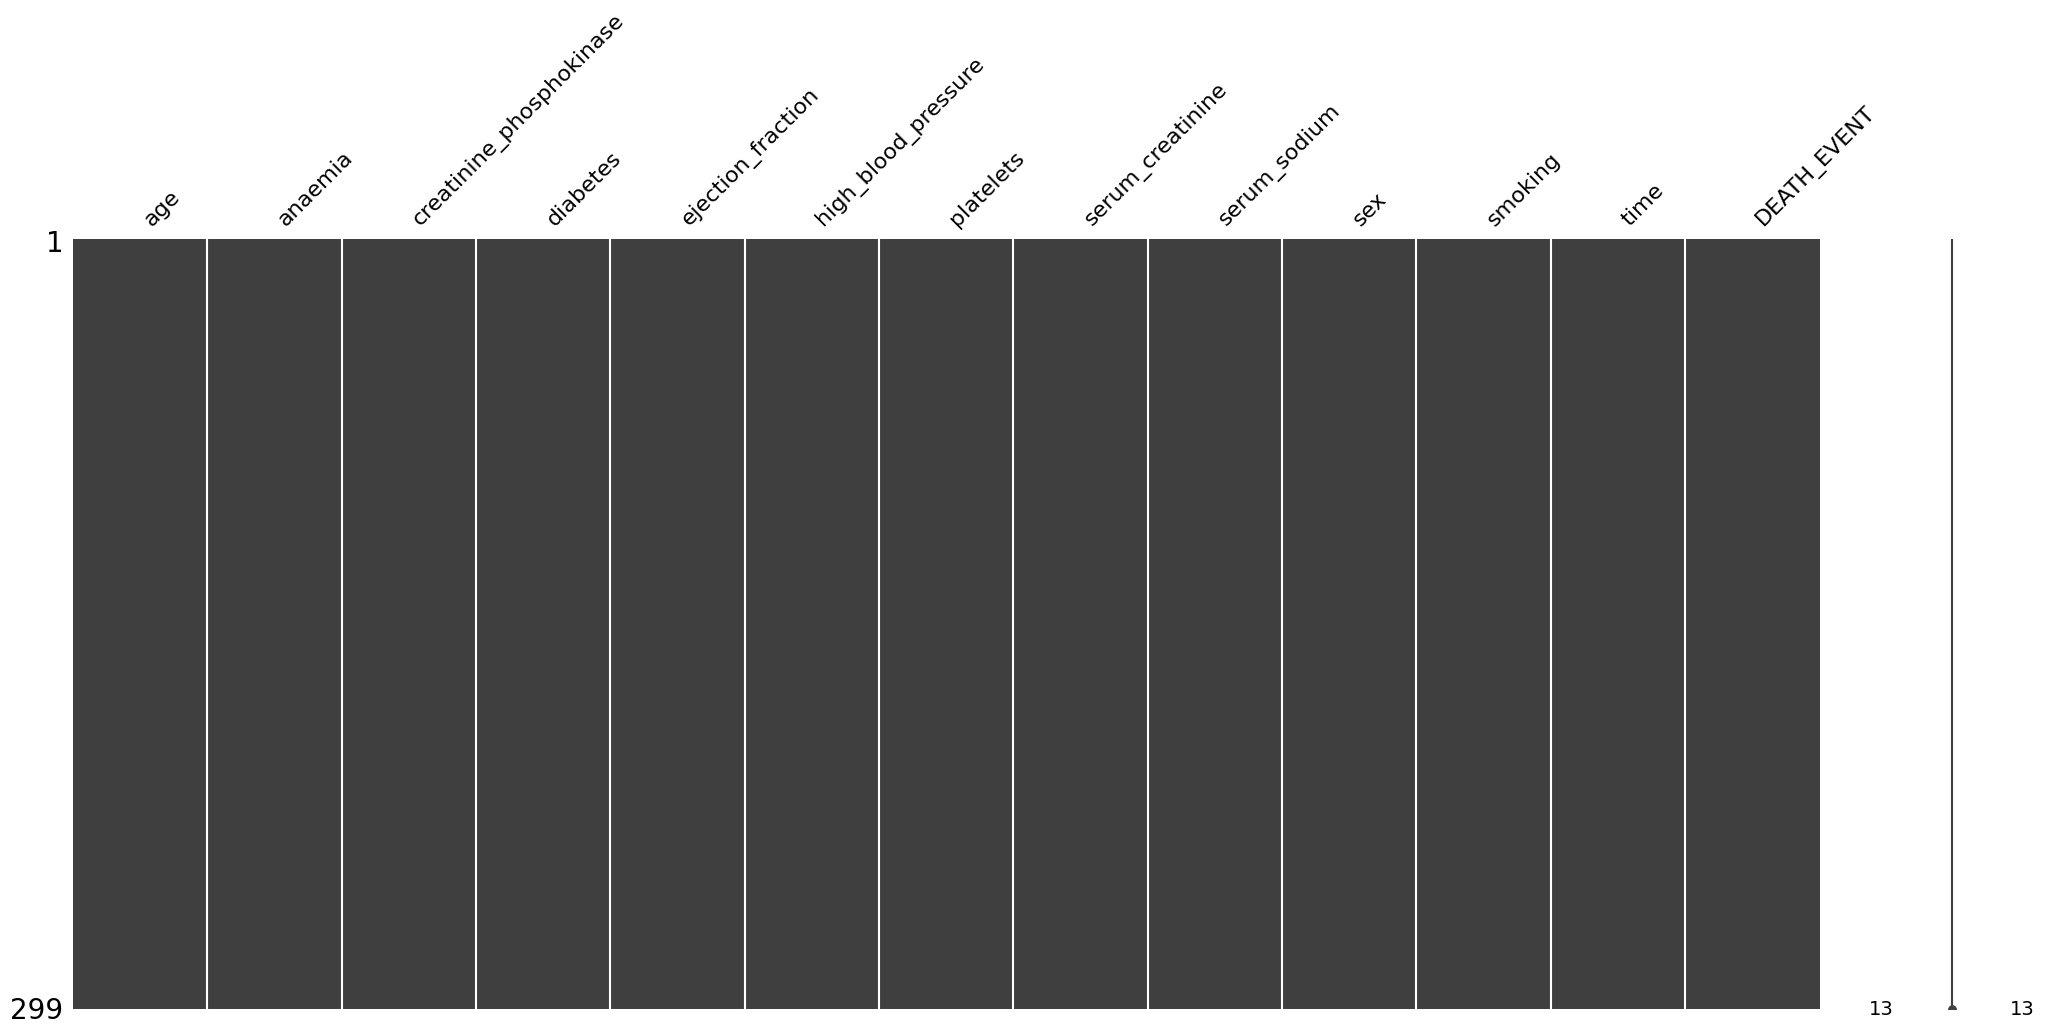

In [92]:
mn.matrix(data)

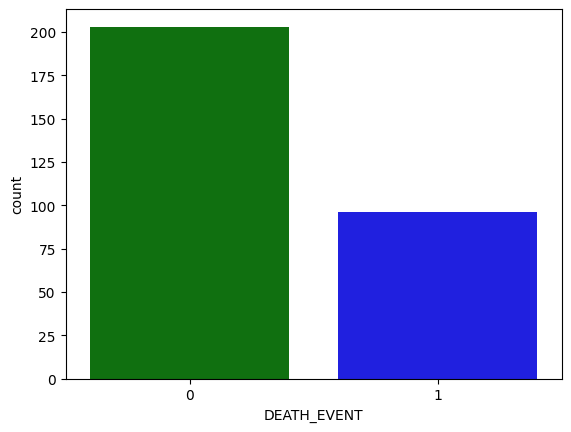

In [93]:
## barplot for the death event
cols= ["green","blue"]
ax = sns.countplot(x= data["DEATH_EVENT"], palette = cols)

In [94]:
# splitting the data into independant and dependant variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [95]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [96]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [97]:
## Split the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=32)

In [169]:
##Preprocessing data
## standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
##LOGISTIC REGRESSION MODEL

In [100]:
## Train the model
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [206]:
## Make predictions
y_pred_LR = model_LR.predict(X_test)

In [207]:
# Create a dataframe with the prediction
pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred_LR})

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,1
123,0,0
242,0,0
103,0,0
296,0,0
204,0,0
115,0,0


In [208]:
## Model evaluation 
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(accuracy_LR)

0.85


In [209]:
## Confusion matrix
conf_mat_LR = confusion_matrix(y_test, y_pred_LR)
print(conf_mat_LR)

[[37  4]
 [ 5 14]]


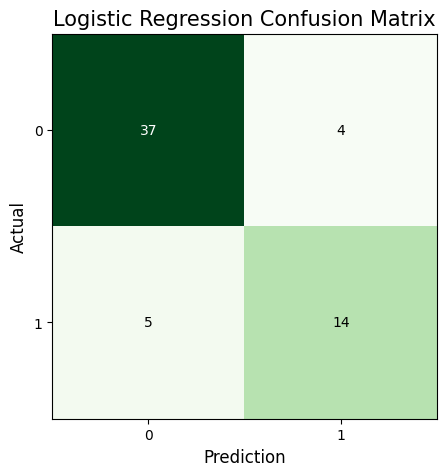

In [210]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_LR, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('Logistic Regression Confusion Matrix', fontsize = 15)
plt.show()

In [211]:
auc_LR = roc_auc_score(y_test, y_pred_LR)
print('AUC: ',auc_LR)

AUC:  0.819640564826701


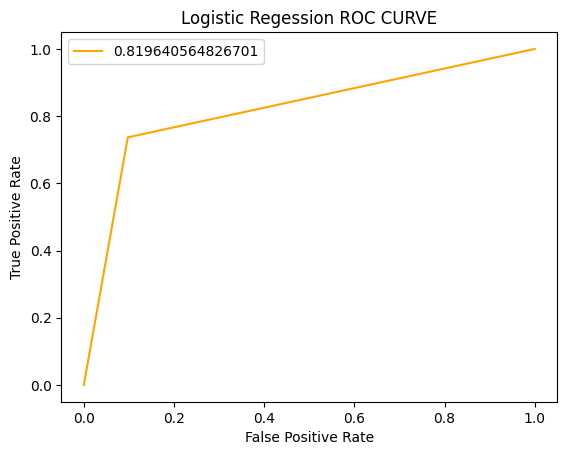

In [212]:
#False positive & true positive rate
# Underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_LR)
plt.plot(fpr, tpr, color = 'orange', label = auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regession ROC CURVE')
plt.legend()
plt.show()

In [213]:
## Classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



In [214]:
## RANDOM FOREST MODEL

In [215]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [216]:
## Make predictions
y_pred_RF = RF_model.predict(X_test)

In [217]:
## Put the predictions in a dataframe
RF_model_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_RF})
RF_model_output

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,1
123,0,0
242,0,0
103,0,0
296,0,0
204,0,0
115,0,0


In [218]:
## Evaluating model accuracy
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(accuracy_RF)

0.8666666666666667


In [219]:
## Confusion matrix
conf_mat_RF = confusion_matrix(y_test, y_pred_RF)
print(conf_mat_RF)

[[36  5]
 [ 3 16]]


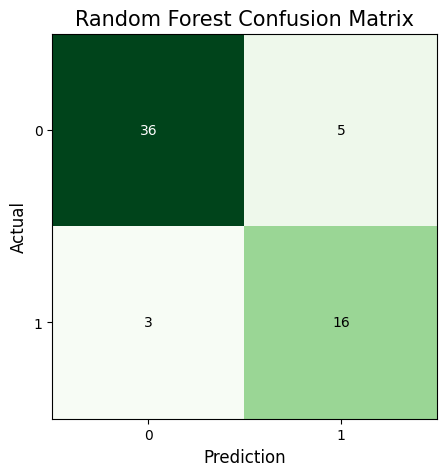

In [220]:
## Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_RF, figsize=(5,5), cmap=plt.cm.Greens)

plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Random Forest Confusion Matrix', fontsize=15)
plt.show()

In [221]:
auc_RF = roc_auc_score(y_test, y_pred_RF)
print('AUC: ',auc_RF)

AUC:  0.8600770218228497


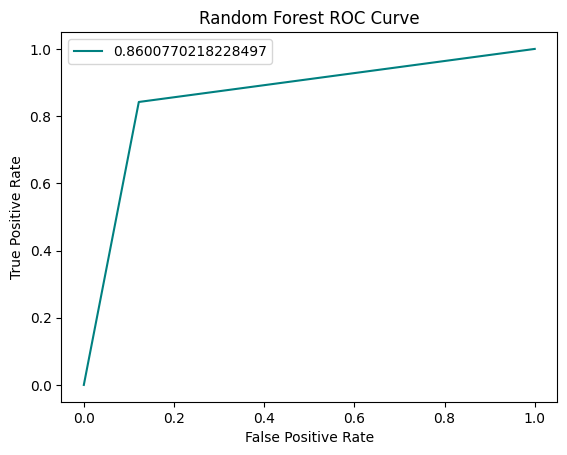

In [222]:
# false positive & true positive rate
# underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_RF)
plt.plot(fpr, tpr, color = 'teal', label = auc_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

In [223]:
## Classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.76      0.84      0.80        19

    accuracy                           0.87        60
   macro avg       0.84      0.86      0.85        60
weighted avg       0.87      0.87      0.87        60



In [224]:
## NAIVE BAYES MODEL

In [226]:
## Create our Naive Bayes model
model_NB = GaussianNB()
## using  training data for fitting
model_NB.fit(X_train, y_train)

GaussianNB()

In [227]:
## Using test data to make prediction
y_pred_NB = model_NB.predict(X_test)

In [228]:
## Putting it in a dataframe

pd.DataFrame({'actual': y_test, 'Predicted': y_pred_NB})

,actual,Predicted
109,0,1
264,0,0
285,0,0
19,1,1
123,0,0
242,0,0
103,0,1
296,0,0
204,0,0
115,0,0


In [229]:
## Model evaluation
accuracy_NB = accuracy_score(y_test, y_pred_NB )

## Confusion matrix
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.75
[[35  6]
 [ 9 10]]


In [230]:
## Classification report
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.62      0.53      0.57        19

    accuracy                           0.75        60
   macro avg       0.71      0.69      0.70        60
weighted avg       0.74      0.75      0.74        60



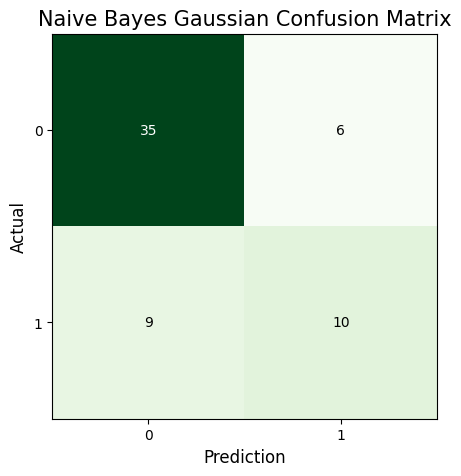

In [231]:
# Confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_NB, figsize=(5,5), cmap=plt.cm.Greens)

plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Naive Bayes Gaussian Confusion Matrix', fontsize=15)
plt.show()

In [232]:
auc_NB = roc_auc_score(y_test, y_pred_NB)
print('AUC: ',auc_NB)

AUC:  0.6899871630295249


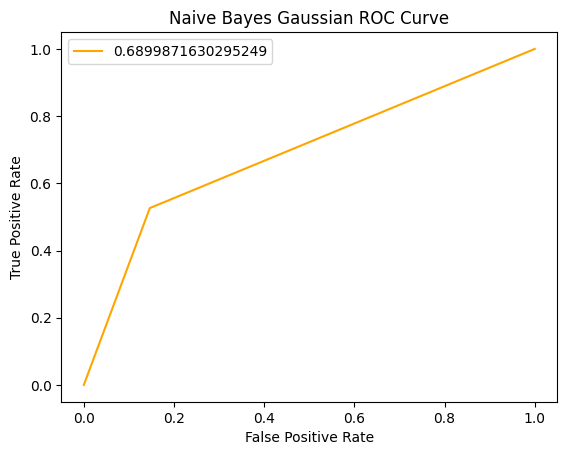

In [205]:
#false positive & true positive rate
# underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_NB)
plt.plot(fpr, tpr, color = 'orange', label = auc_NB)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Gaussian ROC Curve')
plt.legend()
plt.show()

In [170]:
## Artificial Neural Network(ANN)Model

In [171]:
## initialize the neural network
model = Sequential()

## input layers
model.add(Dense(units= 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

## hidden layer
model.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu'))

## regularization
model.add(Dropout(0.25))


## output layer

model.add(Dense(units= 1,kernel_initializer = 'uniform', activation = 'sigmoid'))


In [172]:
## compile the network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [173]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                208       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [174]:
## train the network
history = model.fit(X_train, y_train, batch_size = 25, epochs = 20, validation_split=0.25)

Epoch 1/20
8/8 [==============================] - 1s 28ms/step - loss: 0.6928 - accuracy: 0.6201 - val_loss: 0.6913 - val_accuracy: 0.7333
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.6592 - val_loss: 0.6895 - val_accuracy: 0.7333
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 0.6903 - accuracy: 0.6592 - val_loss: 0.6878 - val_accuracy: 0.7333
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.6592 - val_loss: 0.6861 - val_accuracy: 0.7333
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 0.6878 - accuracy: 0.6592 - val_loss: 0.6843 - val_accuracy: 0.7333
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 0.6865 - accuracy: 0.6592 - val_loss: 0.6819 - val_accuracy: 0.7333
Epoch 7/20
8/8 [==============================] - 0s 6ms/step - loss: 0.6844 - accuracy: 0.6592 - val_loss: 0.6789 - val_accuracy: 0.7333
Epoch 8/20
8/8 [=================

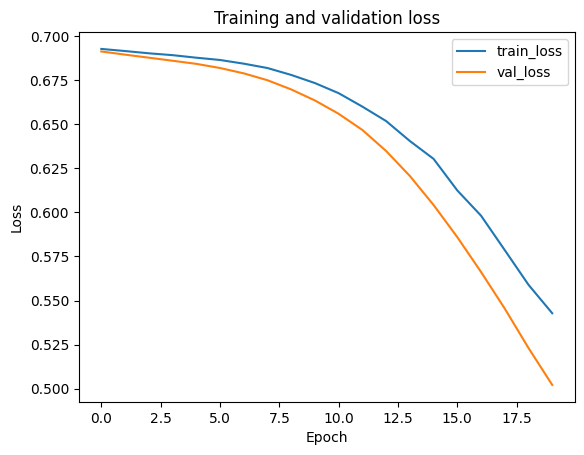

In [175]:
# Train/validation loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

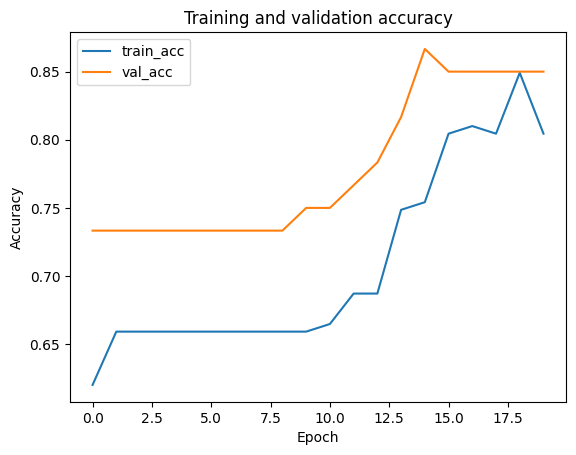

In [176]:
# Train/validation accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [177]:
## save my model
model.save('Artifical_Neural')

INFO:tensorflow:Assets written to: Artifical_Neural\assets


INFO:tensorflow:Assets written to: Artifical_Neural\assets


In [178]:
## load saved model
ann_model = tf.keras.models.load_model('Artifical_Neural')

In [179]:
## make prediction on test data
y_pred_ann = ann_model.predict(X_test)
y_pred_ann

2/2 [==============================] - 0s 2ms/step


array([[0.33150664],
       [0.30667776],
       [0.28531688],
       [0.48077527],
       [0.39564404],
       [0.31176895],
       [0.47011605],
       [0.17393047],
       [0.3810213 ],
       [0.34140915],
       [0.33742186],
       [0.50025195],
       [0.5062169 ],
       [0.6153719 ],
       [0.41928235],
       [0.36272824],
       [0.4265978 ],
       [0.3727272 ],
       [0.4216798 ],
       [0.33711115],
       [0.46286127],
       [0.49195087],
       [0.33597034],
       [0.33727676],
       [0.5250442 ],
       [0.30967295],
       [0.30872813],
       [0.55946296],
       [0.46624833],
       [0.41480568],
       [0.48826757],
       [0.29755074],
       [0.6198315 ],
       [0.33303857],
       [0.59472626],
       [0.32799822],
       [0.3058738 ],
       [0.3287085 ],
       [0.24784045],
       [0.61870056],
       [0.56612515],
       [0.5068705 ],
       [0.379344  ],
       [0.36047316],
       [0.5683919 ],
       [0.3064898 ],
       [0.5590972 ],
       [0.620

In [180]:
## set a threshold
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

In [181]:
y_pred_ann.shape


(60, 1)

In [182]:
y_test.shape

(60,)

In [183]:
## flatten
y_pred_ann = y_pred_ann.flatten()

In [184]:
y_pred_ann.shape

(60,)

In [185]:
print(y_pred_ann)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0]


In [186]:
print(y_test)

109    0
264    0
285    0
19     1
123    0
242    0
103    0
296    0
204    0
115    0
180    0
199    0
167    1
29     1
193    0
161    0
247    0
214    0
91     0
8      1
66     1
60     1
132    0
23     0
101    0
44     1
286    0
148    1
135    0
262    1
14     0
272    0
20     0
156    0
56     0
87     0
151    0
255    0
177    0
18     1
54     1
12     1
283    0
179    0
131    0
113    1
17     1
28     1
222    0
130    0
218    0
164    1
216    0
248    0
209    0
268    0
270    0
11     1
45     1
150    1
Name: DEATH_EVENT, dtype: int64


In [187]:
## put in a dataframe
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
109,0,0
264,0,0
285,0,0
19,1,0
123,0,0
242,0,0
103,0,0
296,0,0
204,0,0
115,0,0


In [188]:
## Classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.67      0.53      0.59        19

    accuracy                           0.77        60
   macro avg       0.73      0.70      0.71        60
weighted avg       0.76      0.77      0.76        60



In [189]:
## confusion matrix
conf_mat_ann = confusion_matrix(y_test, y_pred_ann)
conf_mat_ann

array([[36,  5],
       [ 9, 10]], dtype=int64)

In [190]:
## Model evaluation
accuracy_ann = accuracy_score(y_test, y_pred_ann )
accuracy_ann

0.7666666666666667

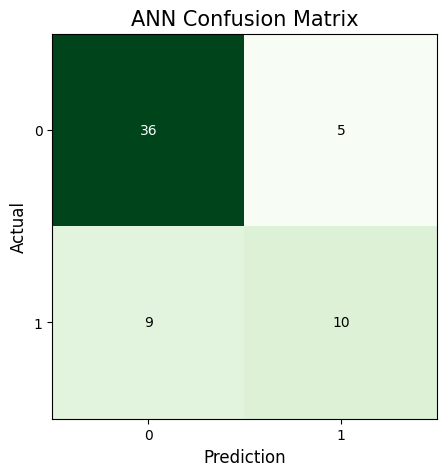

In [191]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat_ann, figsize=(5,5), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)
plt.title('ANN Confusion Matrix', fontsize = 15)
plt.show()

In [194]:
auc_ann = roc_auc_score(y_test, y_pred_ann)
print('AUC: ',auc_ann)

AUC:  0.7021822849807445


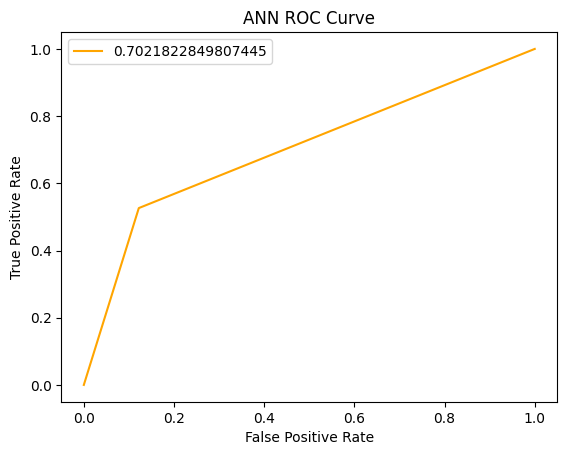

In [195]:
#false positive & true positive rate
# underscore ignores the value:"_"
fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color = 'orange', label = auc_ann)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve')
plt.legend()
plt.show()

In [196]:
## SUPPORT VECTOR MACHINE (SVM) Model

In [197]:
## create a SVM Classifier
clfLinear = svm.SVC(kernel ='linear')
clfsigmoid = svm.SVC(kernel ='sigmoid')
clfrbf = svm.SVC(kernel ='rbf')

In [198]:
## fit the model
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [199]:
## make the prediction for test dadaset 
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [200]:
## model evaluation
## Calculate the accuracy of our model
print('Accurancy(Linear Kernel):', metrics.accuracy_score(y_test,y_pred_linear))
print('Accurancy(Sigmoid Kernel):', metrics.accuracy_score(y_test,y_pred_sigmoid))
print('Accurancy(RBF Kernel):', metrics.accuracy_score(y_test,y_pred_rbf))

Accurancy(Linear Kernel): 0.8333333333333334
Accurancy(Sigmoid Kernel): 0.8
Accurancy(RBF Kernel): 0.75


In [201]:
## Confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[37  4]
 [ 6 13]]
[[36  5]
 [ 7 12]]
[[34  7]
 [ 8 11]]


<Axes: >

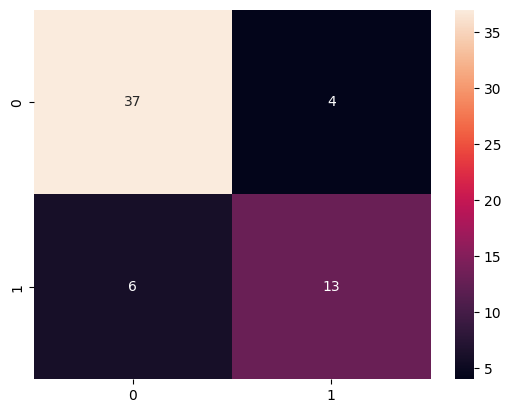

In [202]:
## classification report
sns.heatmap(conf_mat_linear, annot=True, fmt='.0f')

<Axes: >

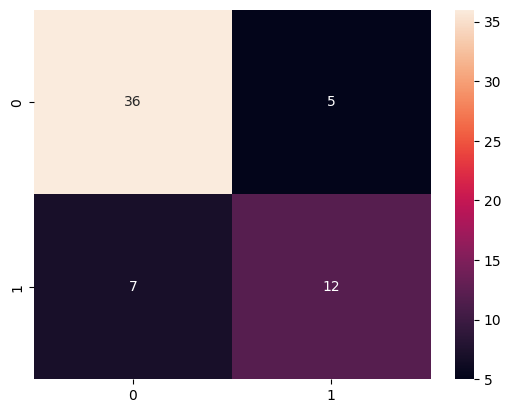

In [203]:
## classification report
sns.heatmap(conf_mat_sigmoid, annot=True, fmt='.0f')

<Axes: >

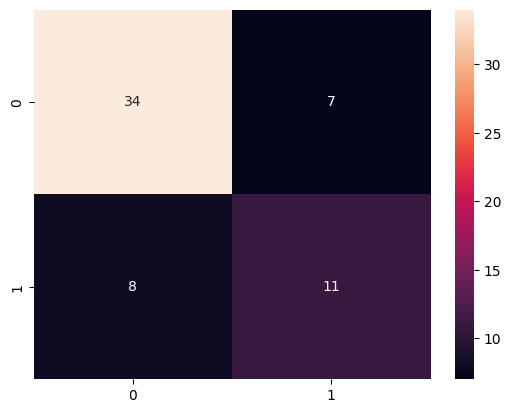

In [204]:
## classification report
sns.heatmap(conf_mat_rbf, annot=True, fmt='.0f')

In [159]:
## classification report
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



In [160]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.71      0.63      0.67        19

    accuracy                           0.80        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.80      0.80      0.80        60



In [161]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.61      0.58      0.59        19

    accuracy                           0.75        60
   macro avg       0.71      0.70      0.71        60
weighted avg       0.75      0.75      0.75        60

